In [7]:
# Load required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from KUtils.eda import chartil
from KUtils.common import utils as cutils

from KUtils.classifier import generic_classifier_utils as gcu

In [8]:
adult_income_df = pd.read_csv('cleaned.csv')

In [9]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,<=50K


In [10]:
adult_income_df_dummy_converted_df = cutils.createDummies(adult_income_df, dummies_creation_drop_column_preference='dropMin', exclude_columns=['target'])


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
adult_income_df_dummy_converted_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_ Male,native-country_ United-States
0,39,11.258240,13,2174,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,50,11.330336,13,0,0,13,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,38,12.281393,9,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
3,53,12.366153,7,0,0,40,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
4,28,12.732011,13,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

adult_income_df_dummy_converted_df[numerical_column_names] = scaler.fit_transform(
    adult_income_df_dummy_converted_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
adult_income_df_dummy_converted_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ White,sex_ Male,native-country_ United-States
0,0.301370,0.369201,0.800000,0.02174,0.0,0.397959,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,0.452055,0.384604,0.800000,0.00000,0.0,0.122449,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
2,0.287671,0.587798,0.533333,0.00000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
3,0.493151,0.605907,0.400000,0.00000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
4,0.150685,0.684072,0.800000,0.00000,0.0,0.397959,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [15]:
# Putting feature variable to X
X = adult_income_df_dummy_converted_df.drop(['target'],axis=1)

# Putting response variable to y
y = adult_income_df_dummy_converted_df['target']

y.head()

from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [16]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [17]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.077605,0.041354,age
1,0.004405,-0.012141,fnlwgt
2,-0.017296,0.170076,education-num
3,-0.007852,0.010093,capital-gain
4,-0.009195,0.009895,capital-loss


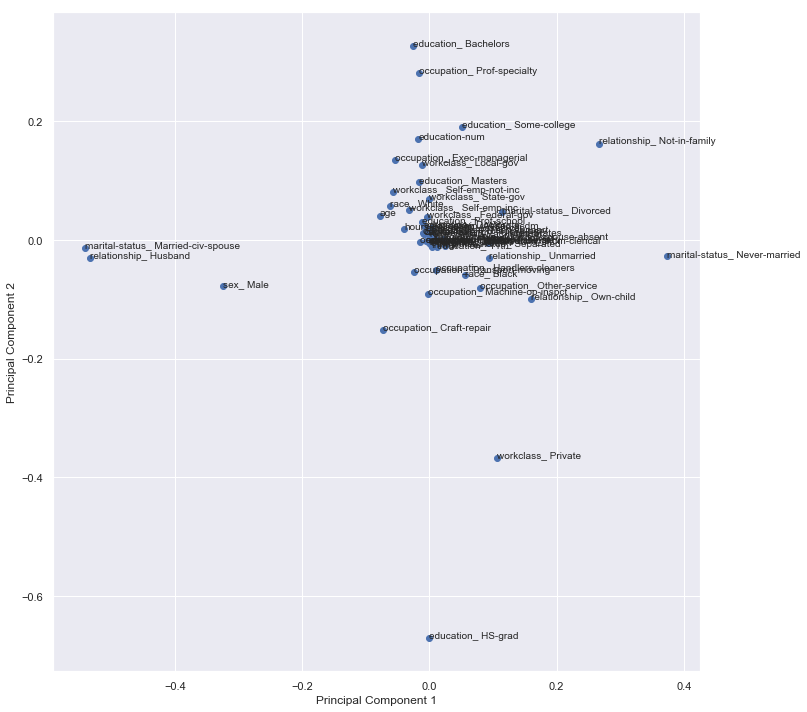

In [19]:
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

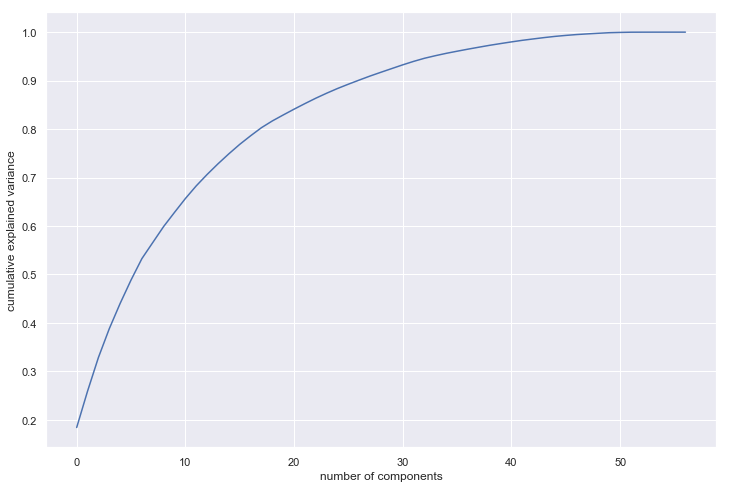

In [20]:
#Making the screeplot - plotting the cumulative variance against the number of components
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax = plt.gca()
# ax.set_xlim(0, 3)
plt.show()

# From 'N' PCA components extract 'M' original features per component (Which adds maximum variance)

In [21]:
from KUtils.cluster import pca_util
pca_df, best_feature_list = pca_util.extract_best_original_feature_from_pca(pca.components_, list(X_train.columns), 2, 3, print_features=False)

In [22]:
print(best_feature_list)

['marital-status_ Never-married', 'relationship_ Not-in-family', 'relationship_ Own-child', 'education_ Bachelors', 'occupation_ Prof-specialty', 'education_ Some-college']


In [23]:
pca_df.head(10)

,Feature,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57
0,age,-0.077605,0.041354,0.143018,-0.005053,-0.049217,0.027771,0.033236,-0.007276,0.003490,0.011639,-0.026685,0.001485,0.014297,0.018509,-0.008653,-0.031691,-0.024740,-0.015869,0.006189,-0.024273,0.020138,0.194747,-0.019097,0.001089,-0.018967,0.120139,-0.038039,0.042412,0.228423,0.030702,0.217795,-0.162415,0.036908,0.177950,0.049645,0.223242,-0.714716,-0.292045,0.026956,0.153040,-0.102530,0.134034,0.075052,0.164547,-0.105705,-0.010402,-0.007044,-0.024120,0.001213,-0.028047,0.016637,0.005068,-0.001715,0.002405,-0.001257,0.000341,0.000000e+00
1,fnlwgt,0.004405,-0.012141,-0.010289,0.006626,0.000261,-0.013068,0.025537,0.004198,-0.000327,0.002673,0.010472,-0.003703,0.005846,0.020721,0.005962,0.003188,0.021228,0.012140,0.002828,0.007995,-0.025539,0.019524,0.011905,-0.021994,-0.041580,-0.091831,-0.011148,-0.152771,-0.043987,-0.036899,0.005323,-0.056445,0.102522,-0.057694,0.108332,-0.028262,0.355085,-0.841884,-0.208133,0.082782,0.025236,0.027528,0.193385,0.010640,-0.070658,0.008562,-0.011929,-0.006980,0.006241,-0.007829,-0.003583,-0.007871,-0.000729,0.000674,-0.000192,-0.000323,2.706169e-16
2,education-num,-0.017296,0.170076,0.003297,-0.048963,-0.012018,-0.109213,-0.027198,-0.008457,0.003471,0.010829,0.066500,-0.101428,-0.111275,-0.081791,-0.024258,0.051014,0.012479,-0.154469,-0.085362,-0.023393,-0.084415,-0.077421,-0.128665,0.101630,0.189914,0.102115,0.156248,-0.080850,-0.077157,-0.114348,-0.083297,-0.175432,-0.075602,-0.244205,-0.017950,0.293177,-0.061399,0.020371,-0.136614,0.043532,0.103123,-0.113960,0.006897,-0.166266,-0.111474,-0.024364,0.029444,-0.145949,0.108537,-0.031555,0.009100,0.006812,-0.531954,0.001400,-0.001605,-0.000148,3.918975e-01
3,capital-gain,-0.007852,0.010093,0.001964,-0.003911,-0.001277,-0.006071,-0.001095,-0.002873,0.003933,-0.003223,-0.003926,-0.006948,-0.009435,0.003368,0.002485,-0.000518,-0.005519,-0.014931,-0.004932,0.007879,-0.002804,0.002009,-0.003717,0.004615,-0.022114,0.020690,-0.002948,-0.001330,0.004456,-0.008567,-0.013427,-0.009001,0.015868,-0.002314,0.026810,0.082175,-0.000678,-0.001359,-0.018299,0.005122,-0.015478,-0.015690,0.016506,0.009886,0.004876,-0.122271,-0.004968,0.022334,-0.017524,0.986475,0.003161,-0.001444,-0.002476,0.000211,0.000002,-0.000015,3.315878e-16
4,capital-loss,-0.009195,0.009895,0.002267,-0.006355,-0.003004,-0.004330,-0.001309,-0.004801,0.000392,0.000968,-0.001303,-0.003214,-0.010977,0.001709,0.003254,-0.003033,0.000098,-0.007496,-0.001641,0.002563,-0.008703,0.003250,-0.009137,0.002730,-0.005533,0.010837,0.009482,-0.001247,0.004176,-0.003551,0.001443,-0.009725,0.014813,-0.001714,-0.002873,0.057861,-0.005119,0.003729,-0.027754,-0.000072,0.001802,-0.025793,-0.018808,0.015478,0.043950,0.988265,0.035057,-0.002377,0.001432,0.115724,0.008667,-0.000086,0.000427,0.000835,0.000403,0.000115,-1.534823e-16
5,hours-per-week,-0.039578,0.018442,0.020464,-0.039482,-0.027507,0.009104,0.024762,-0.006355,0.024554,0.004093,0.011461,-0.030845,-0.023243,0.023557,-0.026523,0.014708,-0.013375,-0.009488,0.010130,-0.018477,0.006720,-0.049285,-0.029899,0.035766,-0.021803,0.033846,-0.003856,-0.053176,0.013583,0.000991,-0.101421,0.033331,-0.073520,-0.038084,0.032009,0.097488,0.109678,0.090297,-0.069970,0.054315,0.053370,-0.383991,0.069039,0.865809,-0.130591,-0.021627,0.023946,0.003471,0.019203,-0.029758,-0.005638,0.000343,0.001114,-0.000940,0.001182,0.000016,1.578598e-16
6,workclass_ Federal-gov,-0.003735,0.039345,0.036076,-0.012465,0.062393,0.032801,0.018304,-0.040801,0.010015,-0.008536,0.062153,-0.019890,0.039735,0.001266,-0.000819,-0.009234,0.015590,-0.029350,-0.073125,0.160411,0.083574,-0.017685,0.031223,0.031185,-0.041409,0.220408,0.219121,-0.132298,-0.353806,0.2324

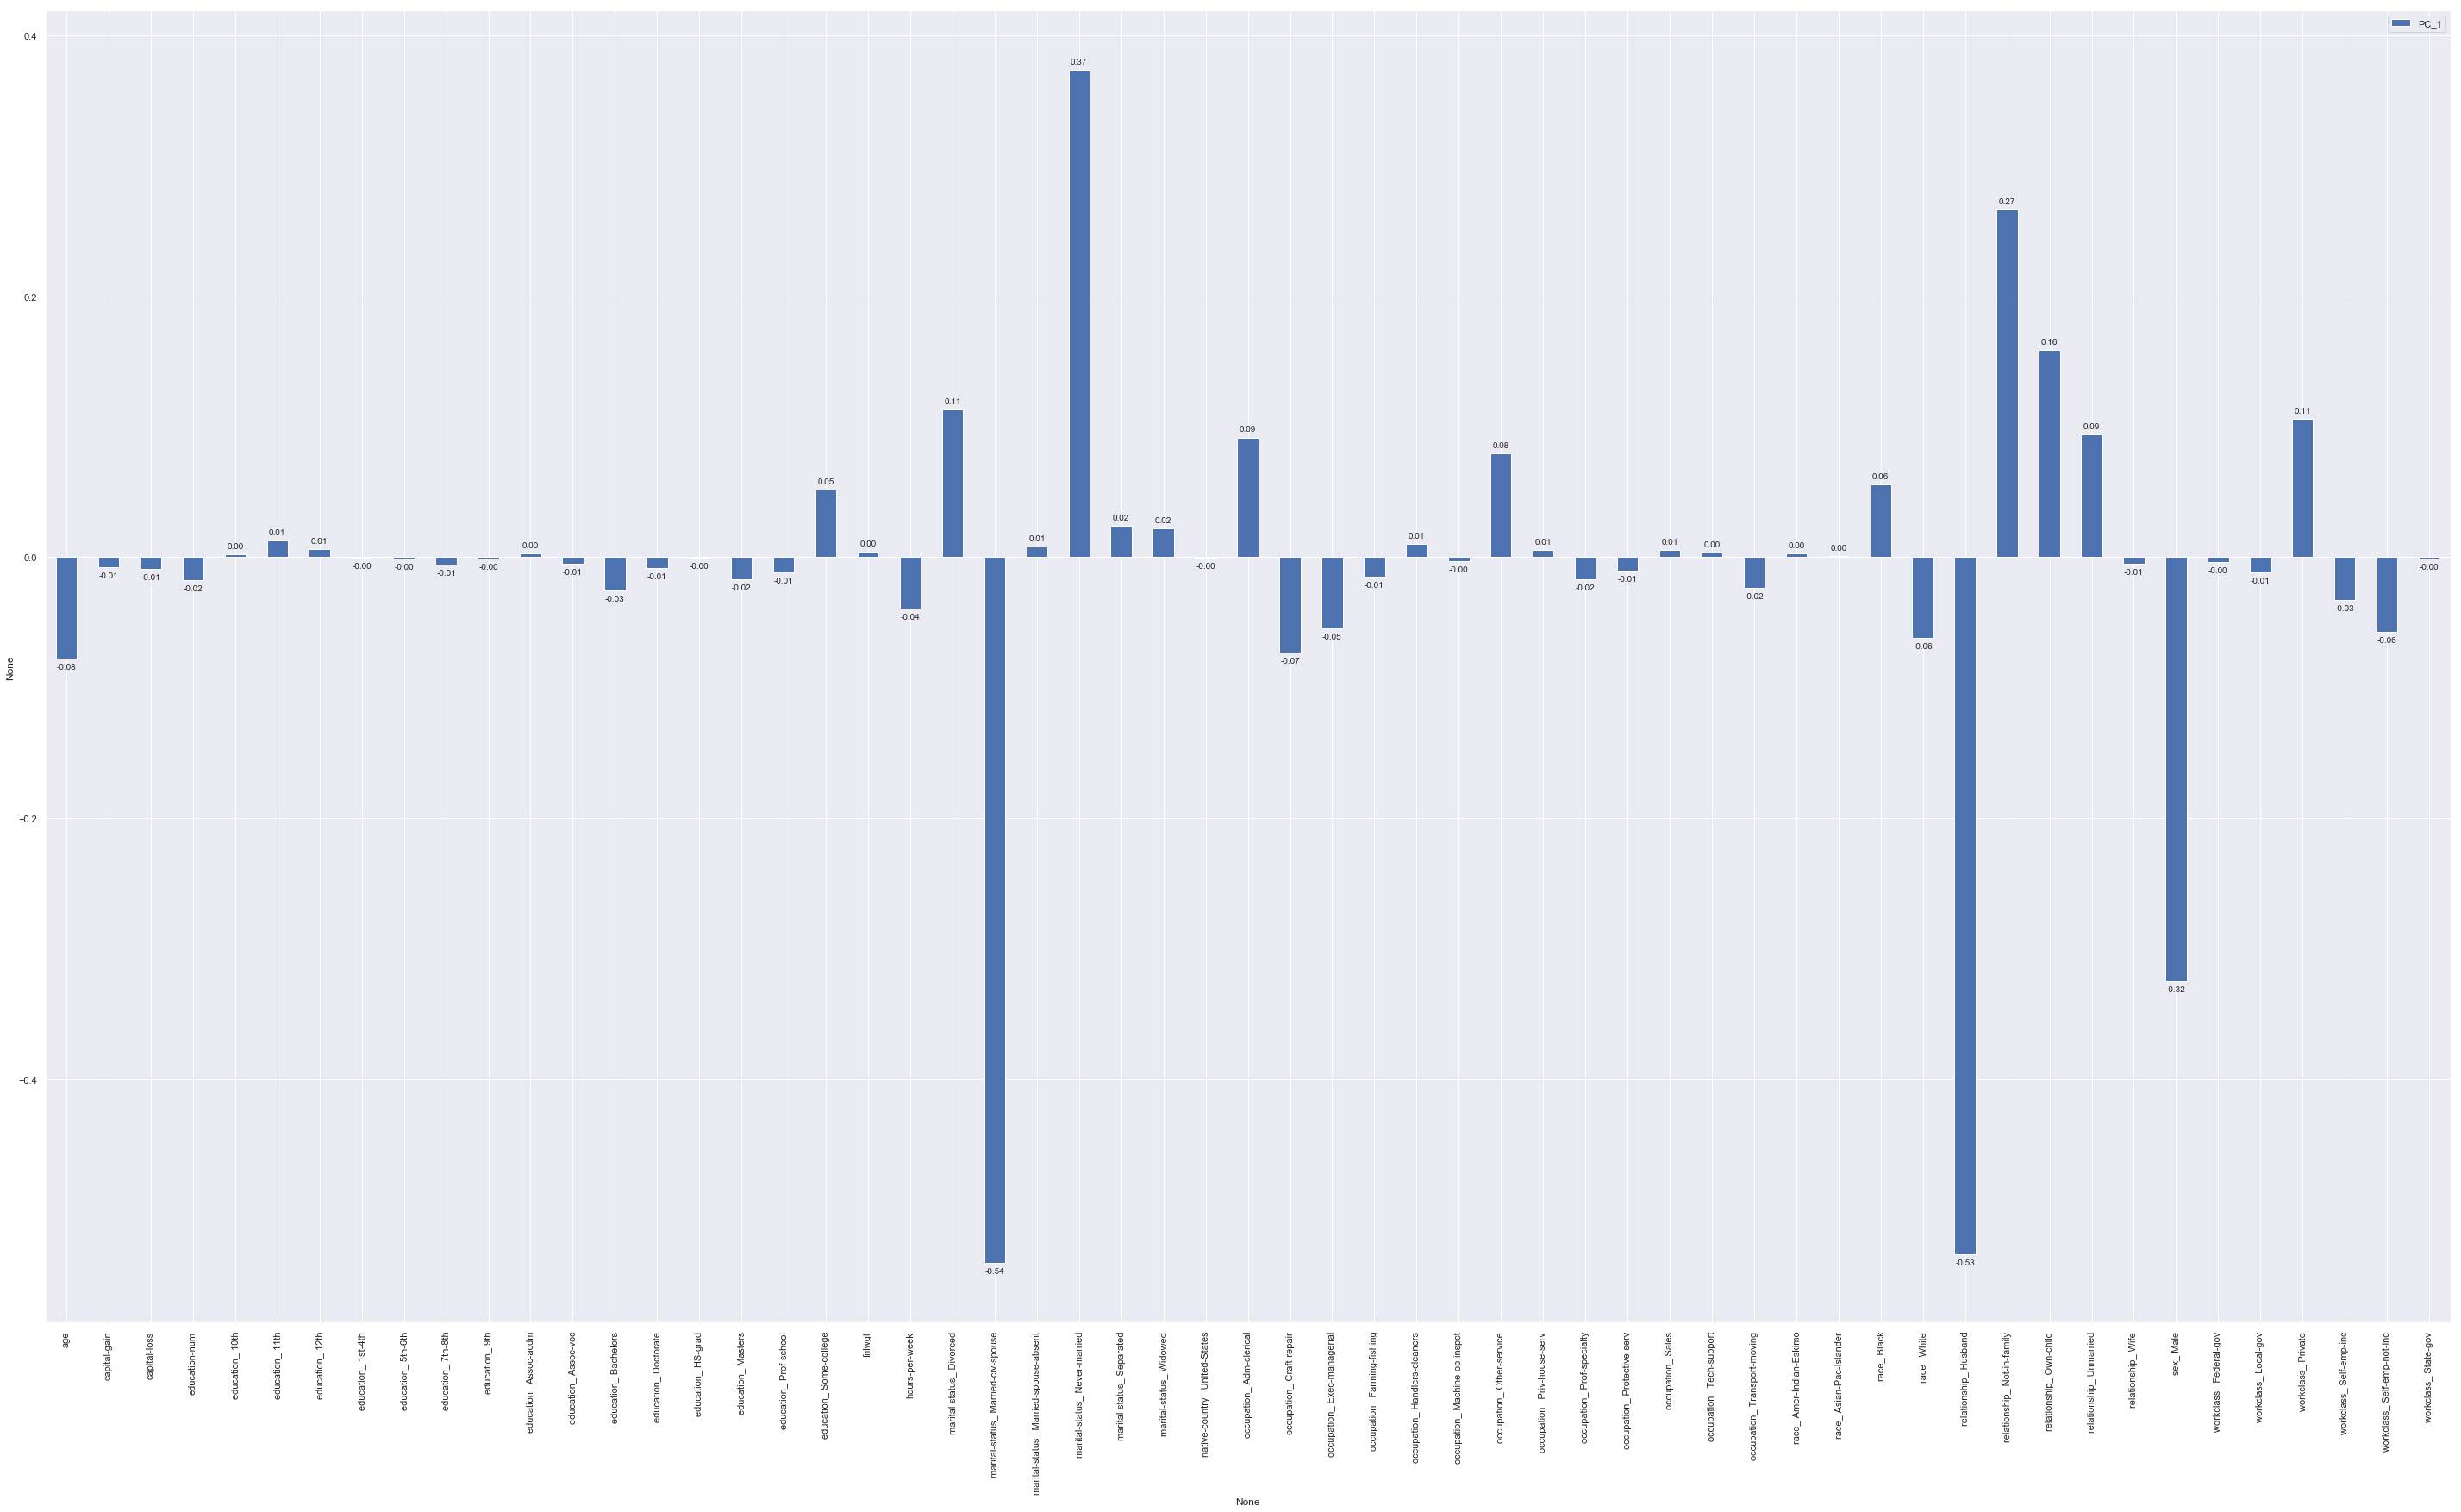

In [24]:
aSeriesDf = pca_df[['PC_1', 'Feature']]
aSeriesDf.set_index('Feature',inplace=True)
chartil.core_barchart_from_series(aSeriesDf, optional_settings={'decimal_precision':2})

# Using PCA build few fetures instead of all

max corr: 0.016846849549823645 , min corr:  -0.04583042977974595


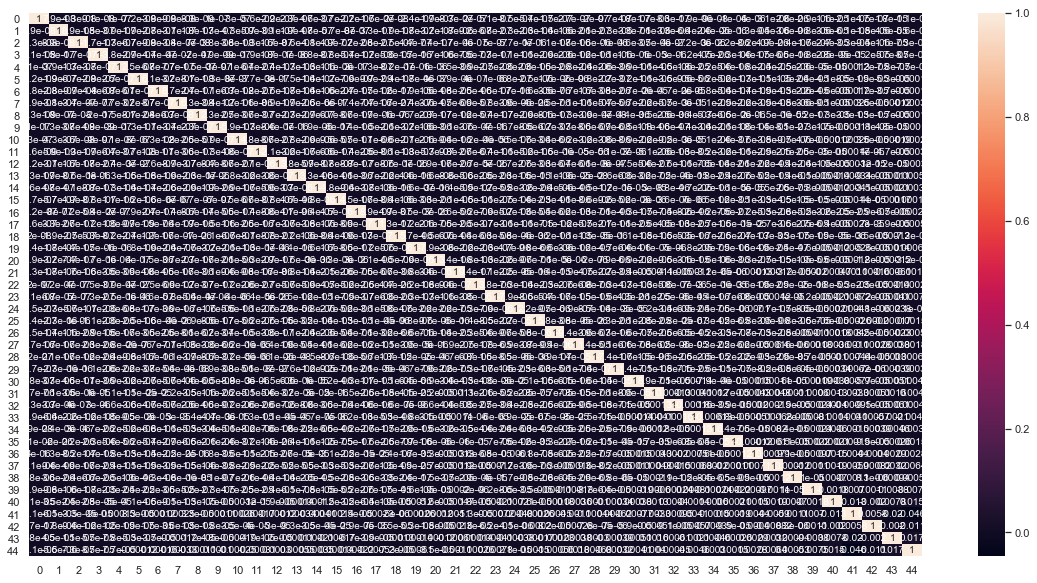

In [25]:
#Using incremental PCA for efficiency - to slect specific number of new features - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)


# #### Basis transformation - getting the data onto our PCs

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape


# #### Creating correlation matrix for the principal components - we expect little to no correlation

#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())


#plotting the correlation matrix
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0


### ^ Perfect capture of variance and independent of each other with near zero co-relation

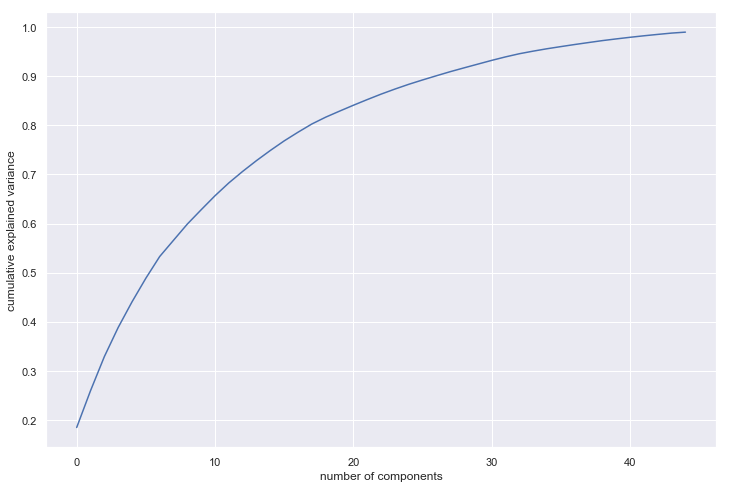

array([0.18420836, 0.25917485, 0.32867565, 0.38808943, 0.44031862,
       0.48847136, 0.53271135, 0.56586877, 0.59893057, 0.62809207,
       0.65663335, 0.68282132, 0.70631499, 0.72828865, 0.74894912,
       0.76845317, 0.78613355, 0.80289121, 0.81679392, 0.82907208,
       0.84104953, 0.8525834 , 0.86370617, 0.87402847, 0.8837401 ,
       0.8926311 , 0.90117269, 0.90950735, 0.91729214, 0.92493842,
       0.93254663, 0.93967346, 0.94610605, 0.95138684, 0.9562642 ,
       0.96063088, 0.96487833, 0.96889256, 0.97283368, 0.97629887,
       0.97959532, 0.98266247, 0.98548644, 0.98815408, 0.99009712])

In [26]:
pca_final.explained_variance_ratio_
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()
np.cumsum(pca_final.explained_variance_ratio_)

# Using PCA select number of features based on required variance capture

In [27]:
pca_again = PCA(0.99) # Capture maxumum of 0.95 or 95% variance


df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(21502, 45)

# Try using WoE

In [28]:
from KUtils.classifier import generic_classifier_utils as gcu

In [29]:
adult_income_df = pd.read_csv('cleaned.csv')

In [30]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,<=50K


In [31]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30718 entries, 0 to 30717
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null float64
education         30718 non-null object
education-num     30718 non-null int64
marital-status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital-gain      30718 non-null int64
capital-loss      30718 non-null int64
hours-per-week    30718 non-null int64
native-country    30718 non-null object
target            30718 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 3.5+ MB


In [32]:
categorical_to_treat = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [33]:
adult_income_df['target'] = adult_income_df['target'].map({' >50K':1, ' <=50K':0})

In [34]:
woe_converted_df, iv_df = gcu.iv_woe(adult_income_df, categorical_to_treat,target_column='target',
                                      value_preference='WoE', drop_original_column=True, show_woe=True)

workclass
Information value of workclass is 0.122989
               Level  workclass_WoE  workclass_IV
0        Federal-gov       0.641517      0.014731
1          Local-gov       0.231519      0.003859
2            Private      -0.169676      0.020356
3       Self-emp-inc       1.334145      0.079905
4   Self-emp-not-inc       0.183590      0.002914
5          State-gov       0.119024      0.000616
6        Without-pay      -1.000000      0.000607
education
Information value of education is 0.719473
            Level  education_WoE  education_IV
0            10th      -1.449603      0.037081
1            11th      -1.705662      0.060267
2            12th      -1.353916      0.015760
3         1st-4th      -2.115135      0.012095
4         5th-6th      -1.923629      0.020579
5         7th-8th      -1.540940      0.028084
6             9th      -1.718096      0.026708
7      Assoc-acdm       0.025935      0.000022
8       Assoc-voc       0.075559      0.000250
9       Bachelors       

D:\projects\datascience\kesh-utils\KUtils\classifier\generic_classifier_utils.py:253: RuntimeWarning: divide by zero encountered in log
  d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])


Information value of occupation is 0.768085
                 Level  occupation_WoE  occupation_IV
0         Adm-clerical       -0.758151       0.056995
1         Armed-Forces       -0.975701       0.000211
2         Craft-repair       -0.123637       0.001976
3      Exec-managerial        1.039774       0.172921
4      Farming-fishing       -0.930112       0.021460
5    Handlers-cleaners       -1.599647       0.071056
6    Machine-op-inspct       -0.843312       0.036490
7        Other-service       -2.033973       0.242025
8      Priv-house-serv       -3.893472       0.024471
9       Prof-specialty        0.899165       0.129592
10     Protective-serv        0.373380       0.003209
11               Sales        0.105640       0.001361
12        Tech-support        0.279937       0.002529
13    Transport-moving       -0.280207       0.003791
relationship
Information value of relationship is 1.492828
             Level  relationship_WoE  relationship_IV
0          Husband          0.926

In [35]:
from sklearn.preprocessing import MinMaxScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = MinMaxScaler()

woe_converted_df[numerical_column_names] = scaler.fit_transform(
    woe_converted_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [36]:
# Putting feature variable to X
X = woe_converted_df.drop(['target'],axis=1)

# Putting response variable to y
y = woe_converted_df['target']

y.head()

from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [37]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [38]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [39]:
from KUtils.cluster import pca_util
pca_df, best_feature_list = pca_util.extract_best_original_feature_from_pca(pca.components_, list(X_train.columns), 2, 3, print_features=True)


For PC_1 Top 3 variations captured from
               Feature      PC_1
1               fnlwgt  0.002496
13  native-country_WoE -0.000587
3         capital-gain -0.003873

For PC_2 Top 3 variations captured from
               Feature      PC_2
8   marital-status_WoE  0.166104
10    relationship_WoE  0.125306
12             sex_WoE  0.023237

Important features extracted from PCA based on max variance

['fnlwgt', 'native-country_WoE', 'capital-gain', 'marital-status_WoE', 'relationship_WoE', 'sex_WoE']


In [40]:
pca_df.head()

,Feature,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,age,-0.039305,-0.001439,0.002696,0.037821,-0.003722,0.089725,0.008296,0.986503,-0.111392,0.024928,-0.006251,-0.016130,-0.025011,-0.041713
1,fnlwgt,0.002496,0.002473,-0.005583,-0.007527,-0.003461,-0.019303,0.044285,-0.111334,-0.980566,0.035501,-0.149070,-0.004711,-0.011153,-0.004440
2,education-num,-0.016225,-0.118170,0.139690,-0.020736,0.015500,-0.011933,0.005572,-0.039286,0.022507,-0.025257,-0.095548,-0.009475,-0.045459,-0.975419
3,capital-gain,-0.003873,-0.006948,0.005410,-0.003041,0.002366,0.012183,-0.000467,0.018192,-0.011923,0.032403,0.001001,-0.105711,0.992457,-0.045539
4,capital-loss,-0.004636,-0.006067,0.003722,-0.002517,-0.000783,0.005129,-0.003805,0.016984,-0.000917,0.021524,-0.042368,0.993163,0.104179,-0.010314


In [41]:
print(best_feature_list)

['fnlwgt', 'native-country_WoE', 'capital-gain', 'marital-status_WoE', 'relationship_WoE', 'sex_WoE']


In [42]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.039305,-0.001439,age
1,0.002496,0.002473,fnlwgt
2,-0.016225,-0.118170,education-num
3,-0.003873,-0.006948,capital-gain
4,-0.004636,-0.006067,capital-loss


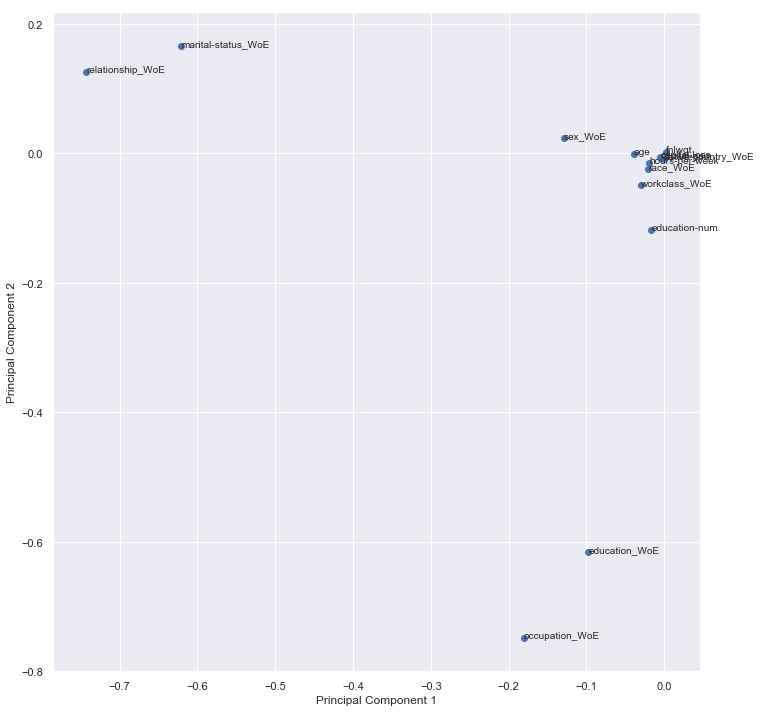

In [43]:
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

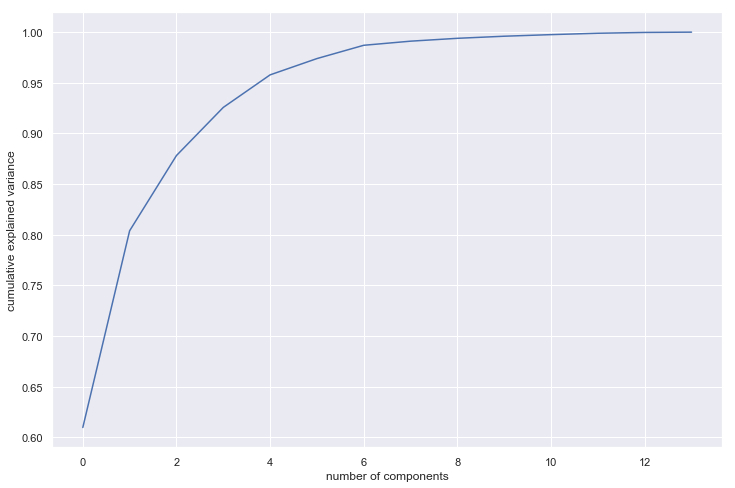

In [44]:
#Making the screeplot - plotting the cumulative variance against the number of components
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax = plt.gca()
# ax.set_xlim(0, 3)
plt.show()

In [45]:
from KUtils.cluster import pca_util
pca_df, best_feature_list = pca_util.extract_best_original_feature_from_pca(pca.components_, list(X_train.columns), 2, 3, print_features=False)

In [46]:
print(best_feature_list)

['fnlwgt', 'native-country_WoE', 'capital-gain', 'marital-status_WoE', 'relationship_WoE', 'sex_WoE']


In [47]:
pca_df.head()

,Feature,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,age,-0.039305,-0.001439,0.002696,0.037821,-0.003722,0.089725,0.008296,0.986503,-0.111392,0.024928,-0.006251,-0.016130,-0.025011,-0.041713
1,fnlwgt,0.002496,0.002473,-0.005583,-0.007527,-0.003461,-0.019303,0.044285,-0.111334,-0.980566,0.035501,-0.149070,-0.004711,-0.011153,-0.004440
2,education-num,-0.016225,-0.118170,0.139690,-0.020736,0.015500,-0.011933,0.005572,-0.039286,0.022507,-0.025257,-0.095548,-0.009475,-0.045459,-0.975419
3,capital-gain,-0.003873,-0.006948,0.005410,-0.003041,0.002366,0.012183,-0.000467,0.018192,-0.011923,0.032403,0.001001,-0.105711,0.992457,-0.045539
4,capital-loss,-0.004636,-0.006067,0.003722,-0.002517,-0.000783,0.005129,-0.003805,0.016984,-0.000917,0.021524,-0.042368,0.993163,0.104179,-0.010314


In [48]:
# Which feature has maximum variance in each PC component
for i in range(0, len(pca.components_),1):
    pca_feature_name = 'PC_'+str(i+1)
    row_with_max_importance = pca_df.loc[pca_df[pca_feature_name] == max(pca_df[pca_feature_name])]
    selective_feature = row_with_max_importance.loc[:, row_with_max_importance.columns.isin(['Feature', pca_feature_name])]
    
    
    print('In {0} max varinace captured from {1} pca corfficeint: {2:.3f}'.format(pca_feature_name,
                                                                               selective_feature.iloc[0]['Feature'],
                                                                               selective_feature.iloc[0][pca_feature_name]))
    
    
    


In PC_1 max varinace captured from fnlwgt pca corfficeint: 0.002
In PC_2 max varinace captured from marital-status_WoE pca corfficeint: 0.166
In PC_3 max varinace captured from education_WoE pca corfficeint: 0.746
In PC_4 max varinace captured from relationship_WoE pca corfficeint: 0.208
In PC_5 max varinace captured from marital-status_WoE pca corfficeint: 0.762
In PC_6 max varinace captured from workclass_WoE pca corfficeint: 0.992
In PC_7 max varinace captured from sex_WoE pca corfficeint: 0.046
In PC_8 max varinace captured from age pca corfficeint: 0.987
In PC_9 max varinace captured from native-country_WoE pca corfficeint: 0.146
In PC_10 max varinace captured from hours-per-week pca corfficeint: 0.995
In PC_11 max varinace captured from education_WoE pca corfficeint: 0.025
In PC_12 max varinace captured from capital-loss pca corfficeint: 0.993
In PC_13 max varinace captured from capital-gain pca corfficeint: 0.992
In PC_14 max varinace captured from education_WoE pca corfficeint:

# t-SNE

In [49]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(n_components=2) # Map it to 2Dimension
tsne_resp = tsne.fit_transform(X_train)

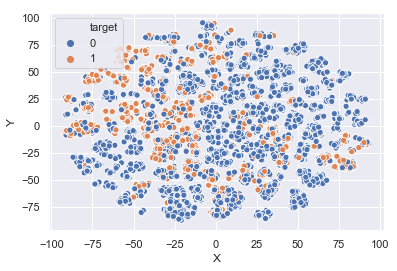

In [51]:
# Convert to a dataframe for plotting with chartil
tsne_coef_df = pd.DataFrame({'X':tsne_resp[:,0],'Y':tsne_resp[:,1], 'target':y_train})
tsne_coef_df['target'] = tsne_coef_df['target'].astype('category')
chartil.plot(tsne_coef_df, ['X', 'Y', 'target'])

# For building model on tsne transfeormed data

In [61]:
transformer=PCA(n_components=2)
transformer.fit(X_train)

dp=transformer.transform(X_train)   
X_train_new=np.concatenate((X_train,dp),axis=1)

dp=transformer.transform(X_test)   
X_test_new=np.concatenate((X_test,dp),axis=1) 

X_train,X_test=X_train_new, X_test_new

# Now use this new transformed dataset for model building

# UMAP
[Refere here](https://umap-learn.readthedocs.io/en/latest/)

In [63]:
import umap

In [54]:
reducer = umap.UMAP()

In [56]:
embedding = reducer.fit_transform(X_train)
embedding.shape

C:\Users\keshav\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


(21502, 2)

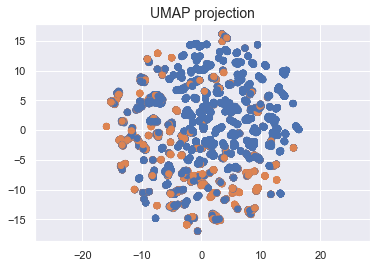

In [58]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y_train])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=14);

# For building model on UMAP transfeormed data

In [65]:
# Refer here https://github.com/amueller/scipy-2016-sklearn/issues/78

transformer=umap.UMAP(n_components=2,n_neighbors=5,min_dist=0.3,metric='correlation')
transformer.fit(X_train)

dp=transformer.transform(X_train)   
X_train_new=np.concatenate((X_train,dp),axis=1)

dp=transformer.transform(X_test)   
X_test_new=np.concatenate((X_test,dp),axis=1) 

X_train,X_test=X_train_new, X_test_new

# Now use this new transformed dataset for model building

C:\Users\keshav\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 127 separate connected components using meta-embedding (experimental)
  n_components
